# Lab 8 
## Notebook following lab tutorial in week 8 folder

Task 1



KNN (K-Nearest Neighbour) is a simple supervised classification algorithm we can use to
assign a class to new instance. KNN does not make any assumptions on the data
distribution. It keeps all the training data to make future predictions by computing the
similarity between an input sample and each training instance.

1. Download the data file iris.csv

2. import the dataset and check features

In [12]:
import pandas as pd

df = pd.read_csv("../lab8/iris.csv")
print(df.shape)
print(df.head(5))


(150, 5)
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


3. pre process the data

In [13]:
# check types

print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [14]:
# Checking rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3, 5)


In [15]:
# Dropping the duplicates
df = df.drop_duplicates()

# Count number of rows after removing duplicates
df.count()

sepal length    147
sepal width     147
petal length    147
petal width     147
class           147
dtype: int64

In [16]:
# Counting the number of null values in each column
print(df.isnull().sum())


sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [17]:
# Printing summary statistics on attributes
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Plot histograms of numeric variables:

0.11.2


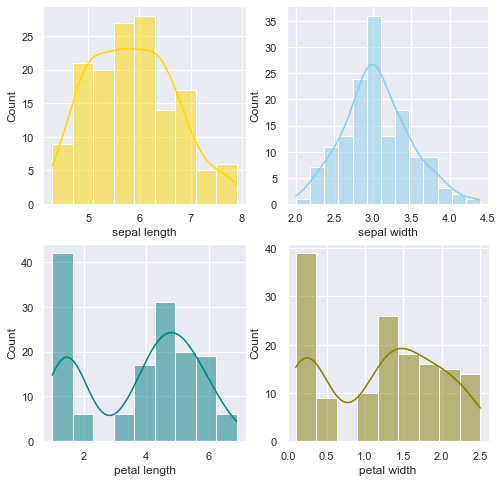

In [18]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

print(sns.__version__)

# set a greay background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# plot the histograms
sns.histplot(data=df, x='sepal length', kde=True, color='gold', ax=axs[0, 0])
sns.histplot(data=df, x='sepal width', kde=True, color='skyblue', ax=axs[0, 1])
sns.histplot(data=df, x='petal length', kde=True, color='teal', ax=axs[1, 0])
sns.histplot(data=df, x='petal width', kde=True, color='olive', ax=axs[1, 1])

plt.show()

4. Specify the input and the target variables

We will use the first four columns, i.e., sepal length, sepal width, petal length and
petal width, as input variables, and the last column, i.e., class, as target variable to
build a kNN classifier.

In [19]:
# create a dataframe with all the variables except the class column
x = df.drop(['class'], axis=1)

# check that the class variable has been removed
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
# seperate the target values
y = df["class"].values

# view the target values
print(y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


5. Split the dataset into two pieces: training set and testing set, using the
‘train_test_split’ function from sklearn. The testing data will be used to check the
accuracy of the kNN model.

In [22]:
# using the 'train_test_split' function from sklearn to split the dataset
from sklearn.model_selection import train_test_split

X_train, X_Vali_test, y_train, y_Vali_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

# Check the size of the input training set:

print(X_train.shape)

(117, 4)


6. Build the kNN classifier

We will create a new k-NN classifier and set ‘n_neighbors’ as ‘3’, which means a
new data point is labelled with by majority from the 3 nearest points.

Next we will use the ‘fit’ function and pass in our training data as parameters to fit the
kNN model to the training data

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

7. Testing the model

Once the model is trained, we can use the ‘predict’ function on our model to make predictions on our testing data. To save space, we will only show the first 5 predictions of our testing set.

In [24]:
#show first 5 model predictions on the test data
print(knn.predict(X_Vali_test)[0:5])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


Now let’s see how accurate our model is on the full testing set. To do this, we will use the ‘score’ function and pass in the testing input and target data to see how well our model predictions match up to the actual results.

In [25]:
#check accuracy of our model on the test data
knn.score(X_Vali_test, y_Vali_test)

0.9666666666666667

Which means, our kNN classifier has an accuracy of approximately 96.67%.